#### A1: Research Question

I will analyze sentiment expressed in customer reviews from different platforms (IMDb, Amazon, Yelp) using Natural Language Processing (NLP) and neural networks. The research question is: 
How accurately can neural network models classify the sentiment of reviews as positive or negative based on textual content?

#### A2: Research Goals and Objectives

The main goal is to develop a predictive model that:

* Accurately classifies review sentiments into positive or negative categories.
* Understands the nuances of textual sentiment to improve customer interaction strategies.
* Provides actionable insights by identifying key sentiment drivers in text data.

#### A3: Neural Network Model

A Convolutional Neural Network (CNN) for NLP tasks is suitable due to its ability to capture hierarchical text structures, making it effective for sentiment classification tasks involving varying lengths and semantic complexities in reviews.

(Analytics Vidhya, CNN vs RNN vs ANN)

#### B1: Exploratory Data Analysis

I will be doing the following to prepare the data from the datasets:

* Check for and handle emojis, special characters, and non-English text, which can be either removed or encoded depending on their frequency and impact on the model's performance.
* Calculate the total number of unique words across all reviews to determine the dimensionality of the input data.
* Typically set based on model complexity and computational feasibility; commonly between 50 to 300.
* Analyze the distribution of review lengths (number of words) and set a maximum sequence length (e.g., 95th percentile) to cover most reviews without truncating too much content.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split

# Load datasets
imdb = pd.read_csv(r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D213\Task_2\imdb_labelled.txt', header=None, sep='\t', names=['Review', 'Sentiment'])
amazon = pd.read_csv(r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D213\Task_2\amazon_cells_labelled.txt', header=None, sep='\t', names=['Review', 'Sentiment'])
yelp = pd.read_csv(r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D213\Task_2\yelp_labelled.txt', header=None, sep='\t', names=['Review', 'Sentiment'])

# Concatenate datasets
combined_data = pd.concat([imdb, amazon, yelp], ignore_index=True)

# Display the first few rows of the data
print(combined_data.head())


                                              Review  Sentiment
0  A very, very, very slow-moving, aimless movie ...          0
1  Not sure who was more lost - the flat characte...          0
2  Attempting artiness with black & white and cle...          0
3       Very little music or anything to speak of.            0
4  The best scene in the movie was when Gerardo i...          1


In [2]:
# Check for the presence of unusual characters and non-English text
print(combined_data[combined_data['Review'].str.contains(r'[^\x00-\x7F]+')])

# Calculate vocabulary size
unique_words = set()
combined_data['Review'].str.lower().str.split().apply(unique_words.update)
print('\n')
print(f"Vocabulary Size: {len(unique_words)}") # Use for builing model in C1



                                                 Review  Sentiment
18    It's practically perfect in all of them  a tr...          1
19     The structure of this film is easily the most...          0
117                 The script iswas there a script?            0
121         I'll even say it again  this is torture.            0
226   This show is made for Americans - it is too st...          0
271   A cheap and cheerless heist movie with poor ch...          0
297   And I forgot: The Casting here i superb, with ...          1
319   The script is bad, very bad  it contains both...          0
359   Let's start with all the problemsthe acting, ...          0
562   Technically, the film is well made with impres...          1
569   I am so tired of clichés that is just lazy wri...          0
646    With great sound effects, and impressive spec...          1
715   Definitely worth seeing it's the sort of thou...          1
1898  My fiancé and I came in the middle of the day ...       

#### B2: Tokenization Goals

My Tokenization goals are

* Normalize text to lower case, remove punctuation, and handle common contractions.
* Convert text into tokens or indices to be used in embeddings.
* Utilize packages like nltk for text processing and keras.preprocessing for converting text sequences into lists of tokens.

In [3]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer(num_words=5000)  # considering only the top 5000 words
tokenizer.fit_on_texts(combined_data['Review'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(combined_data['Review'])



#### B3: Padding Process

* Padding sequences ensures that all inputs into the model have the same length.
* Typically, padding is applied post-sequence to align with the way RNNs (if used) process sequences, with the understanding that recent information (at the end of the sequence) is often more significant than earlier information.

In [4]:
# Pad sequences with 1400 length
maxlen = 1400
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post')

# Display one padded sequence
print("Example of a padded sequence:")
print(padded_sequences[0])

# Analyze sequence length
print('\n')
sequence_lengths = np.array([len(seq) for seq in sequences])
print(f"Mean Sequence Length: {np.mean(sequence_lengths)}")
print(f"Max Sequence Length: {np.max(sequence_lengths)}") # Use for builing model in C1

Example of a padded sequence:
[ 4 17 17 ...  0  0  0]


Mean Sequence Length: 12.97561863173217
Max Sequence Length: 1400


#### B4: Categories and Activation Function

I am classifying sentiments into two categories: positive and negative. Hence, the final layer will use a sigmoid activation function.

#### B5: Prepared Dataset

The prepared dataset will include tokenized and padded text sequences along with labels for training and testing the model. It will be saved in a format that is immediately usable for model training, such as a CSV file.

The standard process of preparing the data for a sentiment analysis task includes:

* Tokenization: Converting text data into tokens (words).
* Sequencing: Mapping tokens to integers.
* Padding: Ensuring all sequences have the same length for model input.
* Splitting: Dividing the data into training, validation, and test sets. The typical split ratios in the industry are approximately 60% training, 20% validation, and 20% test sets.

#### B6: Saved data

In [5]:
# Define labels
labels = combined_data['Sentiment'].values

# Split the data into training and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(padded_sequences, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verify that the training and validation sets are of the same length
assert X_train.shape[0] == y_train.shape[0] 
assert X_val.shape[0] == y_val.shape[0] 

# Save Numpy array to compress file
np.savez_compressed(r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D213\Task_2\Hien_Ta_sentiment_analysis_data.npz', X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test)


#### C1: Model summary output TensorFlow/Keras



In [6]:
# Define the size of the vocabulary and the embedding dimension
vocab_size = 7349 
embedding_dim = 100 
max_sequence_length = 1400 

# Rebuild the model with the 1400 input_length
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    Dropout(0.5),  # Add dropout with a rate of 0.5
    GlobalMaxPooling1D(),
    Dense(1, activation='sigmoid')
])

# Compile the model again
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Print the model summary to understand the structure and number of parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1400, 100)         734900    
                                                                 
 conv1d (Conv1D)             (None, 1396, 128)         64128     
                                                                 
 dropout (Dropout)           (None, 1396, 128)         0         
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 799157 (3.05 MB)
Trainable params: 799157 (3.05 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

#### C2: Layers and Parameters

The network is composed of the following four layers:

* An Embedding layer that translates word indices into dense vectors of fixed size (100 dimensions), accounting for 734,900 parameters (7349 vocab size * 100 embedding size).
* A Conv1D layer with 128 nodes (filters), with a kernel size of 5. This layer is responsible for convolution operations that capture local patterns within the sequences, having 64,128 parameters.
* A GlobalMaxPooling1D layer that reduces the spatial dimensions by taking the maximum value over the time dimension, which aids in reducing complexity and computational load. This layer has no parameters.
* A Dense output layer with 1 node and a 'sigmoid' activation function, which is appropriate for binary classification. It has 129 parameters (128 from the previous layer plus 1 bias).

In total, the model has 799,157 trainable parameters.

(Sawan Saxena, nd)

#### C3: Hyperparameter Justifications

The justifications for the choice of hyperparameters, including the following elements:

* Activation Functions: 'ReLU' in the convolutional layer for its ability to train deep networks efficiently and 'sigmoid' in the output layer for mapping the final output to a probability between 0 and 1, suitable for binary classification.
* Number of Nodes per Layer: 128 nodes in the convolutional layer offer substantial model capacity to learn from complex text data without being excessively large, which might lead to overfitting.
* Loss Function: 'binary_crossentropy' because it's the standard choice for binary classification problems.
* Optimizer: 'adam' for its adaptive learning rate properties, which helps converge to the minimum loss efficiently.
* Stopping Criteria: Early stopping will help in preventing overfitting by terminating the training process when the validation metric (usually the loss) stops improving.
* Evaluation Metric: 'accuracy' is chosen as it directly relates to the proportion of correctly classified instances, which is easy to interpret in a binary classification scenario.

#### D1: Impact of Stopping Criteria

In the training model above the use of early stopping criteria prevents overfitting by halting the training when the validation loss has not improved for a specified number of epochs ('patience'). This means that the model doesn't get excessively trained on the nuances of the training data that do not generalize to unseen data.

In [7]:
# Train the model
epochs = 10
batch_size = 32

history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/10
52/52 [==============================] - 12s 211ms/step - loss: 0.6784 - accuracy: 0.5710 - val_loss: 0.6618 - val_accuracy: 0.7000
Epoch 2/10
52/52 [==============================] - 12s 233ms/step - loss: 0.5236 - accuracy: 0.8210 - val_loss: 0.5102 - val_accuracy: 0.8091
Epoch 3/10
52/52 [==============================] - 13s 246ms/step - loss: 0.2593 - accuracy: 0.9266 - val_loss: 0.4186 - val_accuracy: 0.8109
Epoch 4/10
52/52 [==============================] - 11s 217ms/step - loss: 0.1087 - accuracy: 0.9739 - val_loss: 0.4017 - val_accuracy: 0.7982
Epoch 5/10
52/52 [==============================] - 11s 220ms/step - loss: 0.0463 - accuracy: 0.9921 - val_loss: 0.4072 - val_accuracy: 0.8109
Epoch 6/10
52/52 [==============================] - 12s 229ms/step - loss: 0.0235 - accuracy: 0.9970 - val_loss: 0.4215 - val_accuracy: 0.8091
Epoch 7/10
52/52 [==============================] - 12s 229ms/step - loss: 0.0118 - accuracy: 0.9994 - val_loss: 0.4320 - val_accuracy: 0.8036

#### D2: Assess the fitness of the model

To assess the fitness of a neural network model like the one above, I will look at several key indicators:

* Training Performance: How well does the model fit the training data? Ideally, the training accuracy should be high, and the training loss should be low.

* Validation Performance: Does the model generalize well to unseen data? The validation accuracy and loss provide insight into this. A model that performs well on the validation set is considered to be generalizing well.

* Overfitting Indicators: If the model has a high training accuracy but a significantly lower validation accuracy, it might be overfitting. Overfitting is when a model learns the details and noise in the training data to an extent that it negatively impacts the performance of the model on new data.

#### D3: Visualization of the Train data

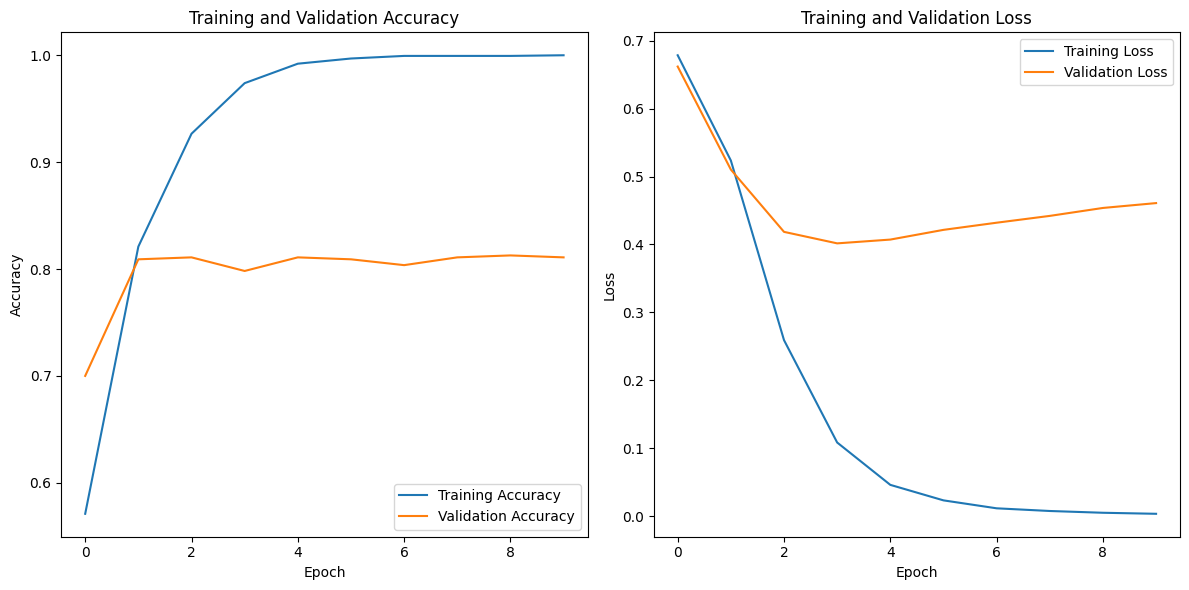

In [8]:
# Plot the training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### D4: Trained Predictive Accuracy

The above plots from the training process offer valuable insights into the model's performance:

* Training Accuracy: The training accuracy increases sharply and levels off near 100%, which suggests that the model is capable of fitting the training data very well.

* Validation Accuracy: The validation accuracy increases initially but then plateaus at around 80%. This behavior is typical in model training, where the model learns quickly at first, but improvements on the validation set become harder to achieve as training continues.

From the plots, we can deduce the following about the predictive accuracy:

* The model is highly accurate on the training set, which is expected as the model weights are tuned to minimize the loss on this data. However, perfect or near-perfect training accuracy is often a sign of overfitting, especially when accompanied by lower validation accuracy.

* The validation accuracy is good but not excellent, and it does not reach the same level as the training accuracy. This indicates a gap between the model's performance on seen (training) data and unseen (validation) data, which is a hallmark of overfitting.

* Overfitting is further evidenced by the validation loss plot. Although the validation loss decreases initially, it starts to increase after a few epochs while the training loss continues to decrease. This divergence is a strong indicator that the model is beginning to memorize the training data rather than learning generalizable patterns.

In terms of predictive accuracy using the chosen evaluation metric (accuracy), the trained network is likely to perform with around 80% accuracy.

#### E1: Neural Network Code

In [10]:
# Save the entire model to a HDF5 file
model.save(r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D213\Task_2\Hien_Ta_sentiment_analysis_model.h5')

#### F1: Discussing the Functionality and Impact of Network Architecture

The neural network created is a Convolutional Neural Network (CNN) tailored for natural language processing tasks. The functionality and impact of the network architecture can be summarized as follows:

* Embedding Layer: The model begins with an embedding layer that effectively captures the semantic meanings of words by translating them into dense vectors. This layer is fundamental in NLP tasks as it allows the model to interpret words in a way that captures their context within the text.

* Convolutional Layer: The use of convolutional layers in NLP is somewhat analogous to their use in image processing; they can pick up on patterns in the sequence of data (in this case, text). For sentiment analysis, this means the model can detect sentiment-indicative phrases and linguistic patterns.

* Dropout Layer: This layer randomly sets a fraction of input units to 0 during training, which helps prevent overfitting by making the network's neurons less sensitive to the weights of other neurons. It forces the network to learn more robust features that are useful in conjunction with many different random subsets of the other neurons.

* Global Max Pooling Layer: This reduces the dimensionality of the data, which helps to lessen overfitting and reduce computational load. It also helps the model to capture the most important signal from the convolutional layer outputs.

* Dense Output Layer with Sigmoid Activation: The final layer outputs a probability indicating the likelihood of the input review being positive. The sigmoid activation function is ideal for binary classification problems like this one.

(Analytics Vidhya, CNN vs RNN vs ANN)

(Sawan Saxena, nd)

#### G1: Recommendations for Future Actions

Based on the results of the model training and validation:

* Address Overfitting: If the validation accuracy lags behind training accuracy, or if validation loss starts to increase while training loss continues to decrease, consider strategies to combat overfitting, such as further tweaking dropout rates, adding regularization, or simplifying the network architecture.

* Hyperparameter Tuning: Experiment with different hyperparameters, such as learning rate, batch size, number of epochs, and architecture details like the number of filters in the convolutional layers or the size of the embeddings.

* Expand Data Collection: If feasible, collecting more data can improve the model's ability to generalize. More data provides a greater variety of examples from which the model can learn, which is particularly useful if the current dataset does not capture the full scope of language used in reviews.

* Cross-Validation: Employ k-fold cross-validation to better assess the model's performance. This technique can be more robust than a single train-validation split, especially if there's a risk of the validation set not being representative.

* Experiment with Different Architectures: Explore alternative architectures, such as Recurrent Neural Networks (RNNs) with LSTM or GRU layers, which are well-suited to sequential data like text.

* Deployment Considerations: If the model achieves satisfactory performance, consider deploying it to a production environment, but plan for continuous monitoring and retraining with new data to maintain model performance over time.

* Continuous Learning and Model Updating: Sentiment and language can evolve, so implement a system for the model to continue learning from new data, and update the model periodically to reflect changes in language usage patterns.

(Analytics Vidhya, CNN vs RNN vs ANN)

(Samarth Argrawal, Splite Data)

(Sawan Saxena, nd)

#### H: Jupyter Notebook

I will provide my Jupyter Notebook and a pdf version when submitting this task.

#### I: Code Source

(Samarth Argrawal, Splite Data): https://towardsdatascience.com/how-to-split-data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c

#### J: Source References

(Analytics Vidhya, CNN vs RNN vs ANN): https://www.analyticsvidhya.com/blog/2020/02/cnn-vs-rnn-vs-mlp-analyzing-3-types-of-neural-networks-in-deep-learning/

(Samarth Argrawal, Splite Data): https://towardsdatascience.com/how-to-split-data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c

(Sawan Saxena, nd): https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce